In [52]:
import pymongo

client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client["OMIE"]

In [53]:
import pandas as pd

omie_data = db["precio_omie"]

# Consulta para obtener los documentos de mercado diario con país español
query = {"Country": "ESPAÑOL"}

# Obtener los documentos que cumplen la consulta y transformarlos a una lista
data = list(omie_data.find(query, {"_id": 0, "Mercado_Diario.Hora": 1, "Mercado_Diario.Precio": 1}))

# Crear el DataFrame
dict_data = {}
for d in data:
    for i in range(len(d['Mercado_Diario'])):
        for k, v in d['Mercado_Diario'][i].items():
            if k not in dict_data:
                dict_data[k] = []
            dict_data[k].append(v)
# Crear el dataframe
df = pd.DataFrame(dict_data)

df


,Hora,Precio
0,2020-01-01T00:00:00,41.88
1,2020-01-01T01:00:00,38.60
2,2020-01-01T02:00:00,36.55
3,2020-01-01T03:00:00,32.32
4,2020-01-01T04:00:00,30.85
...,...,...
27715,2023-02-28T19:00:00,170.00
27716,2023-02-28T20:00:00,176.17
27717,2023-02-28T21:00:00,165.01
27718,2023-02-28T22:00:00,158.41


In [54]:
import numpy as np

# ordenar el dataframe por hora
df = df.sort_values('Hora')

# Convertir fechas a timestamps
df['Hora'] = pd.to_datetime(df['Hora'])

In [55]:
from sklearn.preprocessing import MinMaxScaler

df = df.dropna()
# df = df.drop(df.index[0])

scaler = MinMaxScaler()
data_norm = scaler.fit_transform(df[['Precio']])
df

,Hora,Precio
0,2020-01-01 00:00:00,41.88
1,2020-01-01 01:00:00,38.60
2,2020-01-01 02:00:00,36.55
3,2020-01-01 03:00:00,32.32
4,2020-01-01 04:00:00,30.85
...,...,...
27715,2023-02-28 19:00:00,170.00
27716,2023-02-28 20:00:00,176.17
27717,2023-02-28 21:00:00,165.01
27718,2023-02-28 22:00:00,158.41


In [112]:
import pandas as pd

# Obtener la última fecha del DataFrame original
ultima_fecha = df.tail(1)['Hora'].iloc[0]

# Crear un nuevo rango de fechas con la frecuencia horaria y con un mes más
nueva_fecha = pd.date_range(start=ultima_fecha, periods=10000, freq='H')
nuevo_df = pd.DataFrame({'Hora': nueva_fecha})
nuevo_df

,Hora
0,2023-02-28 23:00:00
1,2023-03-01 00:00:00
2,2023-03-01 01:00:00
3,2023-03-01 02:00:00
4,2023-03-01 03:00:00
...,...
9995,2024-04-20 10:00:00
9996,2024-04-20 11:00:00
9997,2024-04-20 12:00:00
9998,2024-04-20 13:00:00


In [57]:
# import numpy as np

# # ordenar el dataframe por hora
# df = df.sort_values('Hora')

# # Convertir fechas a timestamps
# df['Hora'] = pd.to_datetime(df['Hora'])

# ultima_hora = df['Hora'].max()
# horas_proxima_semana = pd.date_range(ultima_hora, periods=169, freq='H')
# df_proxima_semana = pd.DataFrame({'Hora': horas_proxima_semana})
# df_proxima_semana['Hora'] = df_proxima_semana['Hora'].astype(np.int64) // 10**9
# #dfprox = pd.concat([df, df_proxima_semana]).reset_index(drop=True)

# df['Hora'] = df['Hora'].astype(np.int64) // 10**9


# # Obtener la última hora registrada


# # Agregar las horas de la próxima semana a la columna 'Hora'



# # crear los datos de entrenamiento X e y
# X = np.array(df['Hora']).reshape(-1, 1)
# y = np.array(df['Precio'])
# z = np.array(df_proxima_semana["Hora"]).reshape(-1, 1)
# print(X)
# print(y)
# print(z)

In [58]:
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import train_test_split
# # Crear un objeto de regresión lineal y ajustar el modelo con los datos de entrenamiento
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# reg = LinearRegression()
# reg.fit(X_train, y_train)

# # Realizar predicciones con los datos de prueba
# y_pred = reg.predict(X_test)

# # Evaluar el modelo con el error cuadrático medio (MSE)
# mse = mean_squared_error(y_test, y_pred)
# print("Error cuadrático medio (MSE):", mse)

In [59]:
# import matplotlib.pyplot as plt

# # Graficar los datos de entrenamiento
# plt.scatter(X_train, y_train, color='blue', label='Entrenamiento')
# # Graficar los datos de prueba
# plt.scatter(X_test, y_test, color='green', label='Prueba')
# # Graficar la predicción
# plt.plot(X_test, y_pred, color='red', label='Predicción')
# plt.legend()
# plt.show()

In [60]:
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import train_test_split
# import numpy as np

# # Crear un objeto de características polinómicas de grado 2
# poly = PolynomialFeatures(degree=20)

# # Generar características polinómicas de grado 2 a partir de X
# X_poly = poly.fit_transform(X)

# # Dividir los datos en conjuntos de entrenamiento y prueba
# X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2)

# # Ajustar un modelo de regresión lineal a las características polinómicas
# reg = LinearRegression()
# reg.fit(X_train, y_train)

# # Realizar predicciones con los datos de prueba
# y_pred = reg.predict(X_test)

# # Evaluar el modelo con el error cuadrático medio (MSE)
# mse = mean_squared_error(y_test, y_pred)
# print("Error cuadrático medio (MSE):", mse)

In [61]:
# from sklearn.preprocessing import PolynomialFeatures

# modelo = LinearRegression()

# pf = PolynomialFeatures(degree = 20)
# modelo.fit(X.reshape(-1,1),y)
# y1 = modelo.coef_*X.min() + modelo.intercept_
# y2 = modelo.coef_*X.max() + modelo.intercept_
# plt.plot([X.min(), X.max()],[y1, y2], c= "r")
# plt.scatter(X,y)
# X_pol = pf.fit_transform(X.reshape(-1,1))
# modelo.fit(X_pol, y)
# y_pred = modelo.predict(X_pol)
# plt.plot(X,y_pred, c="orange")

In [62]:
# x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# # Generar características polinómicas para el rango de valores de X
# x_poly = poly.fit_transform(x_range)

# # Realizar predicciones con el modelo ajustado
# y_pred = reg.predict(x_poly)

# plt.scatter(X_train[:,1], y_train, color='blue', label='Entrenamiento')
# plt.scatter(X_test[:,1], y_test, color='green', label='Prueba')
# plt.plot(x_range, y_pred, color='red', label='Predicción')
# plt.xlabel('Hora')
# plt.ylabel('Temperatura')
# plt.legend(loc='upper left')
# plt.show()

In [63]:
df

,Hora,Precio
0,2020-01-01 00:00:00,41.88
1,2020-01-01 01:00:00,38.60
2,2020-01-01 02:00:00,36.55
3,2020-01-01 03:00:00,32.32
4,2020-01-01 04:00:00,30.85
...,...,...
27715,2023-02-28 19:00:00,170.00
27716,2023-02-28 20:00:00,176.17
27717,2023-02-28 21:00:00,165.01
27718,2023-02-28 22:00:00,158.41


In [64]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_squared_error



# Crear conjunto de características y etiquetas
X = np.array(df['Hora'])
y = np.array(df['Precio'])



# Normalizar características
Xscaler = StandardScaler()
X = Xscaler.fit_transform(X.reshape(-1,1))
yscaler = StandardScaler()
y = yscaler.fit_transform(y.reshape(-1,1))

"""X_scaler = MinMaxScaler(feature_range=(0, 1))
X = X_scaler.fit_transform(X)

y_scaler = MinMaxScaler(feature_range=(0, 1))
y = y_scaler.fit_transform(y.reshape(-1, 1)).reshape(-1)"""

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1000, activation='relu', input_dim=1),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compilar modelo
model.compile(loss='mean_squared_error',
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001))

# Entrenar modelo
#history = model.fit(X_train, y_train, epochs=1000, batch_size=500, validation_data=(X_test, y_test))
history = model.fit(X_train, y_train, epochs=700, batch_size=50, validation_data=(X_test, y_test))

# Realizar predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo con el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)


Epoch 1/700
444/444 [==============================] - 2s 3ms/step - loss: 0.4745 - val_loss: 0.3044
Epoch 2/700
444/444 [==============================] - 1s 2ms/step - loss: 0.2537 - val_loss: 0.2589
Epoch 3/700
444/444 [==============================] - 1s 2ms/step - loss: 0.2441 - val_loss: 0.2572
Epoch 4/700
444/444 [==============================] - 1s 2ms/step - loss: 0.2432 - val_loss: 0.2568
Epoch 5/700
444/444 [==============================] - 1s 2ms/step - loss: 0.2423 - val_loss: 0.2571
Epoch 6/700
444/444 [==============================] - 1s 3ms/step - loss: 0.2415 - val_loss: 0.2554
Epoch 7/700
444/444 [==============================] - 1s 2ms/step - loss: 0.2413 - val_loss: 0.2554
Epoch 8/700
444/444 [==============================] - 1s 2ms/step - loss: 0.2407 - val_loss: 0.2540
Epoch 9/700
444/444 [==============================] - 1s 2ms/step - loss: 0.2400 - val_loss: 0.2532
Epoch 10/700
444/444 [==============================] - 1s 2ms/step - loss: 0.2400 - val_lo

In [70]:
model.save('my_model.h5')

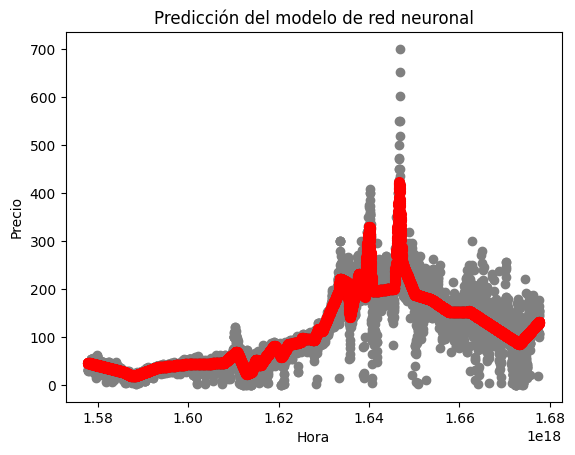

In [65]:
import matplotlib.pyplot as plt

# Mostrar la predicción de la red neuronal
plt.scatter(Xscaler.inverse_transform(X_test), yscaler.inverse_transform(y_test), color='gray')
plt.scatter(Xscaler.inverse_transform(X_test), yscaler.inverse_transform(y_pred), color='red', linewidth=2)
plt.title('Predicción del modelo de red neuronal')
plt.xlabel('Hora')
plt.ylabel('Precio')
plt.show()



In [71]:
from keras.models import load_model

loaded_model = load_model('my_model.h5')

In [113]:
# Escalar los datos de nuevo_df["Hora"]

X_new = Xscaler.transform(np.concatenate((df["Hora"].values, nuevo_df["Hora"].values)).reshape(-1, 1))

# Hacer la predicción utilizando el modelo entrenado
y_pred_new = loaded_model.predict(X_new)

# Escalar la salida de la predicción a la escala original
Xnewscaler = StandardScaler()
y_pred_new = yscaler.inverse_transform(y_pred_new)

# Mostrar la predicción
print(X_new)


1179/1179 [==============================] - 2s 1ms/step
[[-1.7320631 ]
 [-1.73193814]
 [-1.73181317]
 ...
 [ 2.98122843]
 [ 2.9813534 ]
 [ 2.98147837]]


In [68]:
# df.to_csv('precio_horas.csv', index=False)

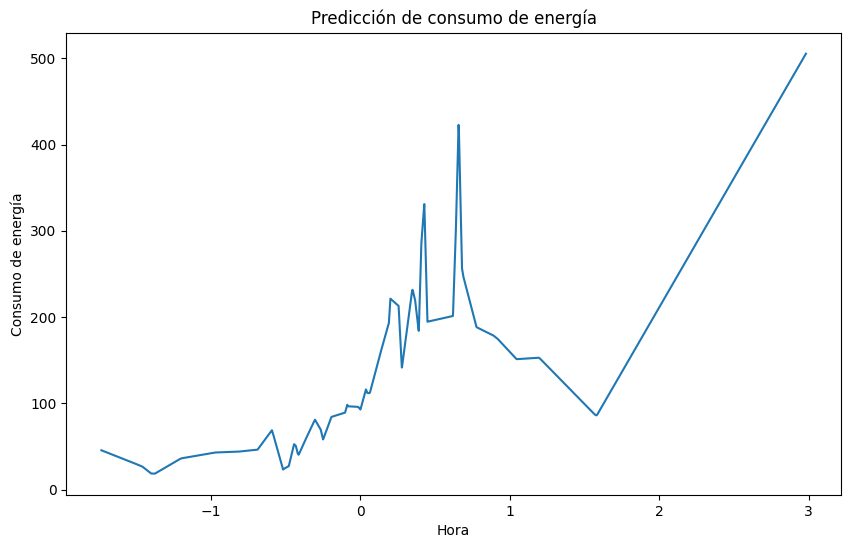

In [114]:
import matplotlib.pyplot as plt


# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar la predicción
ax.plot(X_new, y_pred_new, label="Predicción")

# Agregar leyendas y título
ax.set_xlabel("Hora")
ax.set_ylabel("Consumo de energía")
ax.set_title("Predicción de consumo de energía")

# Mostrar la gráfica
plt.show()


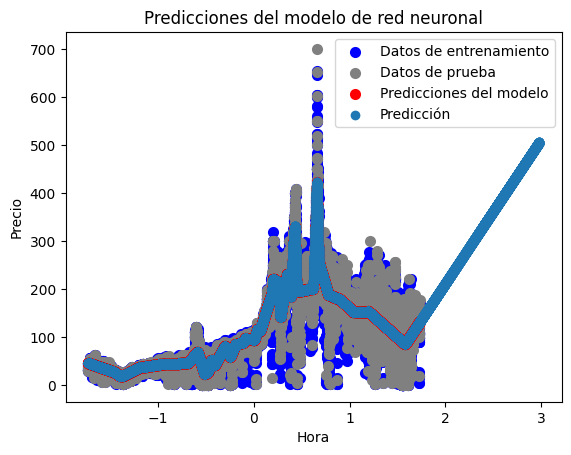

In [122]:
import matplotlib.pyplot as plt

# Graficar datos de entrenamiento y prueba
plt.scatter(X_train, yscaler.inverse_transform(y_train), color='blue', linewidth=2, label='Datos de entrenamiento')
plt.scatter(X_test, yscaler.inverse_transform(y_test), color='gray', linewidth=2, label='Datos de prueba')

# Graficar predicciones del modelo
plt.scatter(X_test, yscaler.inverse_transform(y_pred), color='red', linewidth=2, label='Predicciones del modelo')
plt.scatter(X_new, y_pred_new, label="Predicción")
plt.title('Predicciones del modelo de red neuronal')
plt.xlabel('Hora')
plt.ylabel('Precio')
plt.legend()
plt.show()


In [ ]:
df.shape[0]

27720

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import numpy as np


# Crear conjunto de características y etiquetas
X = np.array(df['Hora'])
y = np.array(df['Precio'])



# Normalizar características
Xscaler = StandardScaler()
X = Xscaler.fit_transform(X.reshape(-1,1))
yscaler = StandardScaler()
y = yscaler.fit_transform(y.reshape(-1,1))

"""X_scaler = MinMaxScaler(feature_range=(0, 1))
X = X_scaler.fit_transform(X)

y_scaler = MinMaxScaler(feature_range=(0, 1))
y = y_scaler.fit_transform(y.reshape(-1, 1)).reshape(-1)"""

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(df.shape[0]/1000, input_dim=1),
    tf.keras.layers.Dense(((df.shape[0]/1000)*2)-1, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compilar modelo
model.compile(loss='mean_squared_error',
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001))

# Entrenar modelo
#history = model.fit(X_train, y_train, epochs=1000, batch_size=500, validation_data=(X_test, y_test))
history = model.fit(X_train, y_train, epochs=1000, batch_size=50, validation_data=(X_test, y_test))

# Realizar predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo con el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)


Epoch 1/1000
444/444 [==============================] - 4s 2ms/step - loss: 0.6591 - val_loss: 0.5295
Epoch 2/1000
444/444 [==============================] - 1s 2ms/step - loss: 0.5152 - val_loss: 0.4668
Epoch 3/1000
444/444 [==============================] - 1s 2ms/step - loss: 0.4453 - val_loss: 0.3955
Epoch 4/1000
444/444 [==============================] - 1s 2ms/step - loss: 0.3742 - val_loss: 0.3309
Epoch 5/1000
444/444 [==============================] - 1s 2ms/step - loss: 0.3165 - val_loss: 0.2868
Epoch 6/1000
444/444 [==============================] - 1s 2ms/step - loss: 0.2814 - val_loss: 0.2648
Epoch 7/1000
444/444 [==============================] - 1s 2ms/step - loss: 0.2650 - val_loss: 0.2559
Epoch 8/1000
444/444 [==============================] - 1s 2ms/step - loss: 0.2579 - val_loss: 0.2535
Epoch 9/1000
444/444 [==============================] - 1s 2ms/step - loss: 0.2542 - val_loss: 0.2509
Epoch 10/1000
444/444 [==============================] - 1s 2ms/step - loss: 0.252

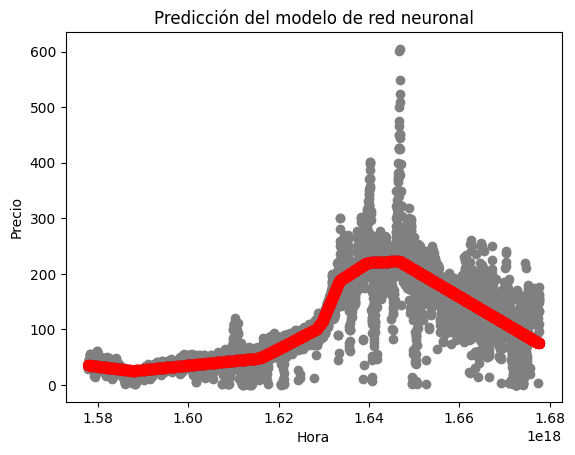

In [ ]:
import matplotlib.pyplot as plt

# Mostrar la predicción de la red neuronal
plt.scatter(Xscaler.inverse_transform(X_test), yscaler.inverse_transform(y_test), color='gray')
plt.scatter(Xscaler.inverse_transform(X_test), yscaler.inverse_transform(y_pred), color='red', linewidth=2)
plt.title('Predicción del modelo de red neuronal')
plt.xlabel('Hora')
plt.ylabel('Precio')
plt.show()
